<a href="https://colab.research.google.com/github/digo-eu/advanced_learning/blob/main/microdados_violencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Usado para baixar a base como microdados_violencia.csv:</h3>
   pip install basedosdados <br>
   import basedosdados as bd <br>
   df = bd.read_table(dataset_id='br_ms_sinan', table_id='microdados_violencia', billing_project_id="violenciasinan", use_bqstorage_api = True) <br>
   df.to_csv(path_or_buf = 'microdados_violencia.csv')

<b>Incluído para simples referência à origem dos dados. Eles já estão incluídos no repositório por meio do Git LFS com o nome <i>"microdados_violencia.csv"</i>.</b> <br>
Necessário criar projeto do Google Big Query para que seja feita a conexão com a base original.

In [32]:
import tensorflow as tf
print(tf.version.VERSION)

AttributeError: module 'tensorflow' has no attribute 'version'

In [25]:
# importar bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc

import tensorflow as tf
from tensorflow import keras
from tf.keras import layers
from tf.keras.callbacks import EarlyStopping
from tf.keras.layers.experimental import preprocessing

pd.set_option('display.max_columns', 100)
from sklearn.metrics import confusion_matrix, classification_report
import itertools
print(tf.__version__)
try:
   physical_devices = tf.config.list_physical_devices('GPU') 
   tf.config.experimental.set_memory_growth(physical_devices[0], True)
   for device in physical_devices:
      tf.config.experimental.set_memory_growth(device, True)
      print(physical_devices)
except:
   print("No GPU")

ImportError: cannot import name 'keras' from 'tensorflow' (unknown location)

In [2]:
df = pd.read_csv('microdados_violencia.csv')
df.head()

Unnamed: 0   ano data_notificacao id_categoria_cid10 id_subcategoria_cid10  \
0           0  2009       2009-11-03                Y09                 Y00.4   
1           1  2009       2009-02-04                Y09                   NaN   
2           2  2009       2009-03-18                Y09                   NaN   
3           3  2009       2009-03-31                Y09                   NaN   
4           4  2009       2009-07-23                Y09                   NaN   

   tipo_notificacao  id_uf_notificacao  id_municipio_notificacao  \
0                 2                 12                 1200104.0   
1                 2                 27                 2700300.0   
2                 2                 27                 2700300.0   
3                 2                 27                 2700300.0   
4                 2                 27                 2700300.0   

   id_municipio_6_notificacao  id_unidade_notificacao  \
0                      120010               2001500.0   
1                      270030               3015408.0   
2                      270030               3015408.0   
3                      270030               3015408.0   
4                      270030               3015408.0   

   id_regional_saude_notificacao data_ocorrencia  id_uf_ocorrencia  \
0                         1937.0      2009-11-03              12.0   
1                         1537.0      2009-02-04              27.0   
2                         1537.0      2009-03-18              27.0   
3                         1537.0      2009-03-31              27.0   
4                         1537.0      2009-07-23              27.0   

   id_municipio_ocorrencia id_municipio_6_ocorrencia hora_ocorrencia  \
0                1200104.0                    120010        02:30:00   
1                2700300.0                    270030        17:58:00   
2                2700706.0                    270070        08:00:00   
3                2709152.0                    270915        00:30:00   
4                2700300.0                    270030        14:11:00   

   local_ocorrencia outro_local_ocorrencia  outras_vezes_ocorrencia  \
0               6.0                    NaN                      0.0   
1               NaN                    NaN                      NaN   
2               1.0                    NaN                      0.0   
3               NaN                    NaN                      NaN   
4               NaN                    NaN                      NaN   

   id_uf_residencia  id_municipio_residencia  id_municipio_6_residencia  \
0                12                1200104.0                     120010   
1                27                2700300.0                     270030   
2                27                2700706.0                     270070   
3                27                2709152.0                     270915   
4                27                2700300.0                     270030   

   id_regional_saude_residencia  idade_paciente  sexo_paciente  \
0                        1937.0            26.0            1.0   
1                        1537.0            27.0            1.0   
2                        1538.0            20.0            1.0   
3                        1545.0            16.0            1.0   
4                        1537.0            12.0            1.0   

   gestante_paciente  raca_paciente  escolaridade_paciente  ocupacao_paciente  \
0                6.0            1.0                    1.0                NaN   
1                6.0            NaN                    NaN                NaN   
2                6.0            NaN                    NaN                NaN   
3                6.0            NaN                    NaN                NaN   
4                6.0            NaN                    NaN                NaN   

   estado_civil_paciente  orientacao_sexual_paciente  \
0                    1.0                         NaN   
1                    NaN            

## Resumo dos dados e objetivos de pesquisa

Nossos dados têm origem no questionário de violência interpessoal ou autoprovocada do SINAN, aplicado em usuários da rede de saúde que se apresentam como casos suspeitos ou confirmados de violência doméstica/intrafamiliar ou extrafamiliar caso a vítima seja criança, adolescente, mulher, idosa, indígena, LGBT ou pessoa com deficiência ou transtorno.

Dentre as perguntas do questionário estão vários fatores que, imaginamos, representam um diferencial de risco quanto a diferentes características dessa violência sofrida, sejam: letalidade, repetição, caráter sexual, entre outras.

A grande quantidade de dados disponíveis nessa base nos levam a crer que seria possível determinar a relação de várias dessas respostas ao questionário com as características mais relevantes da violência sofrida, a fim de traçar um perfil e mais facilmente detectar casos de violência em um cenário de cuidado real, em que vítimas de violência frequentemente escondem a situação por que estão passando.

Demos preferência a uma característica em particular: a reincidência do caso de violência.
Essa característica se apresenta no questionário em forma binária, na forma da pergunta "Ocorreu outras vezes?" para a qual se pode responder "sim", "não" ou "ignorado".

Trata-se portanto de um problema de classificação binária, em que se quer predizer a probabilidade que um indivíduo com dadas características tem de sofrer de violência interpessoal ou autoprovocada repetida. Devemos portanto optar por modelos adequados para essa tarefa. A título de comparação do desempenho, escolhemos:

*   Naive Bayes
*   Regressão Logística
*   K-Nearest Neighbours
*   Support Vector Machine
*   Árvore Decisória
*   Bagging Decision Tree (Ensemble Learning I)
*   Boosted Decision Tree (Ensemble Learning II)
*   Random Forest (Ensemble Learning III)
*   Voting Classification (Ensemble Learning IV)
*   Rede Neural (Deep Learning)

Iremos avaliar a qualidade dos resultados para selecionar o melhor modelo para nossa análise.

## Visualização e tratamento dos dados

A base de dados utilizada contém uma grande quantidade de colunas, com diversos tipos de dados entre elas. Alguns desses dados são pouco úteis para a nossa análise e precisamos avaliá-los e filtrá-los.

In [3]:
# excluir colunas inadequadas para a análise (tornado opcional por enquanto)
df = df.drop(['data_encerramento', 'data_notificacao', 'id_categoria_cid10', 'id_subcategoria_cid10', 'data_ocorrencia', 'hora_ocorrencia', 'id_municipio_notificacao', 'id_municipio_6_notificacao', 'id_unidade_notificacao','id_regional_saude_notificacao', 'id_municipio_ocorrencia', 'id_municipio_6_ocorrencia', 'id_municipio_residencia', 'id_municipio_6_residencia', 'id_regional_saude_residencia','houve_qual_outra_violencia_sexual', 'meio_qual_outro', 'ocorreu_qual_outra', 'outro_local_ocorrencia', 'quais_outras_deficiencias_paciente', 'autor_relacao_outros'], axis=1)

# resumo dos dados
with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df)

Unnamed: 0   ano  tipo_notificacao  id_uf_notificacao  \
0                 0  2009                 2                 12   
1                 1  2009                 2                 27   
...             ...   ...               ...                ...   
2299140     2299140  2016                 2                 33   
2299141     2299141  2016                 2                 33   

         id_uf_ocorrencia  local_ocorrencia  outras_vezes_ocorrencia  \
0                    12.0               6.0                      0.0   
1                    27.0               NaN                      NaN   
...                   ...               ...                      ...   
2299140              33.0               1.0                      1.0   
2299141              33.0               1.0                      0.0   

         id_uf_residencia  idade_paciente  sexo_paciente  gestante_paciente  \
0                      12            26.0            1.0                6.0   
1                      27            27.0            1.0                6.0   
...                   ...             ...            ...                ...   
2299140                33            11.0            0.0                5.0   
2299141                33            17.0            1.0                6.0   

         raca_paciente  escolaridade_paciente  ocupacao_paciente  \
0                  1.0                    1.0                NaN   
1                  NaN                    NaN                NaN   
...                ...                    ...                ...   
2299140            4.0                    3.0           999991.0   
2299141            2.0                    3.0                NaN   

         estado_civil_paciente  orientacao_sexual_paciente  \
0                          1.0                         NaN   
1                          NaN                         NaN   
...                        ...                         ...   
2299140                    1.0                         1.0   
2299141                    NaN                         1.0   

         identidade_genero_paciente  motivacao_violencia  \
0                               NaN                  NaN   
1                               NaN                  NaN   
...                             ...                  ...   
2299140                         8.0                 88.0   
2299141                         8.0                  NaN   

         violencia_relacionada_trabalho  emitiu_cat  \
0                                   0.0         8.0   
1                                   NaN         8.0   
...                                 ...         ...   
2299140                             0.0         8.0   
2299141                             0.0         8.0   

         deficiencia_transtorno_paciente  deficiencia_fisica_paciente  \
0                                    0.0                          8.0   
1                                    NaN                          8.0   
...                                  ...                          ...   
2299140                              0.0                          8.0   
2299141                              0.0                          8.0   

         deficiencia_mental_paciente  deficiencia_visual_paciente  \
0                                8.0                          8.0   
1                                8.0                          8.0   
...                              ...                          ...   
2299140                          8.0                          8.0   
2299141                          8.0                          8.0   

         deficiencia_auditiva_paciente  transtorno_mental_paciente  \
0                                  8.0                         8.0   
1                                  8.0                         8.0   
...                                ...                         ...   
2299140                            8.0                         8.0   
2299141                   

In [6]:
df.isnull().sum()

Unnamed: 0                                   0
ano                                          0
tipo_notificacao                             0
id_uf_notificacao                            0
id_uf_ocorrencia                             0
                                            ..
encaminhamento_delegacia_crianca             0
encaminhamento_delegacia_mulher              0
encaminhamento_delegacia                     0
encaminhamento_justica_infancia_juventude    0
encaminhamento_defensoria_publica            0
Length: 96, dtype: int64

Uma parte significativa de 3 das colunas acima apresentam valor nulo - podemos considerar a possibilidade de excluí-las ou manter para análise.
Optamos por substituir esses valores nulos por 0, de modo a considerar que respostas não dadas são equivalentes a uma resposta negativa às perguntas.

In [5]:
# NaN em 0
df = df.replace (np.nan, 0)

In [7]:
# separando labels e features
feature = df.copy()
label = feature.pop('outras_vezes_ocorrencia')

In [8]:
label.value_counts()

0.0    1517983
1.0     781159
Name: outras_vezes_ocorrencia, dtype: int64

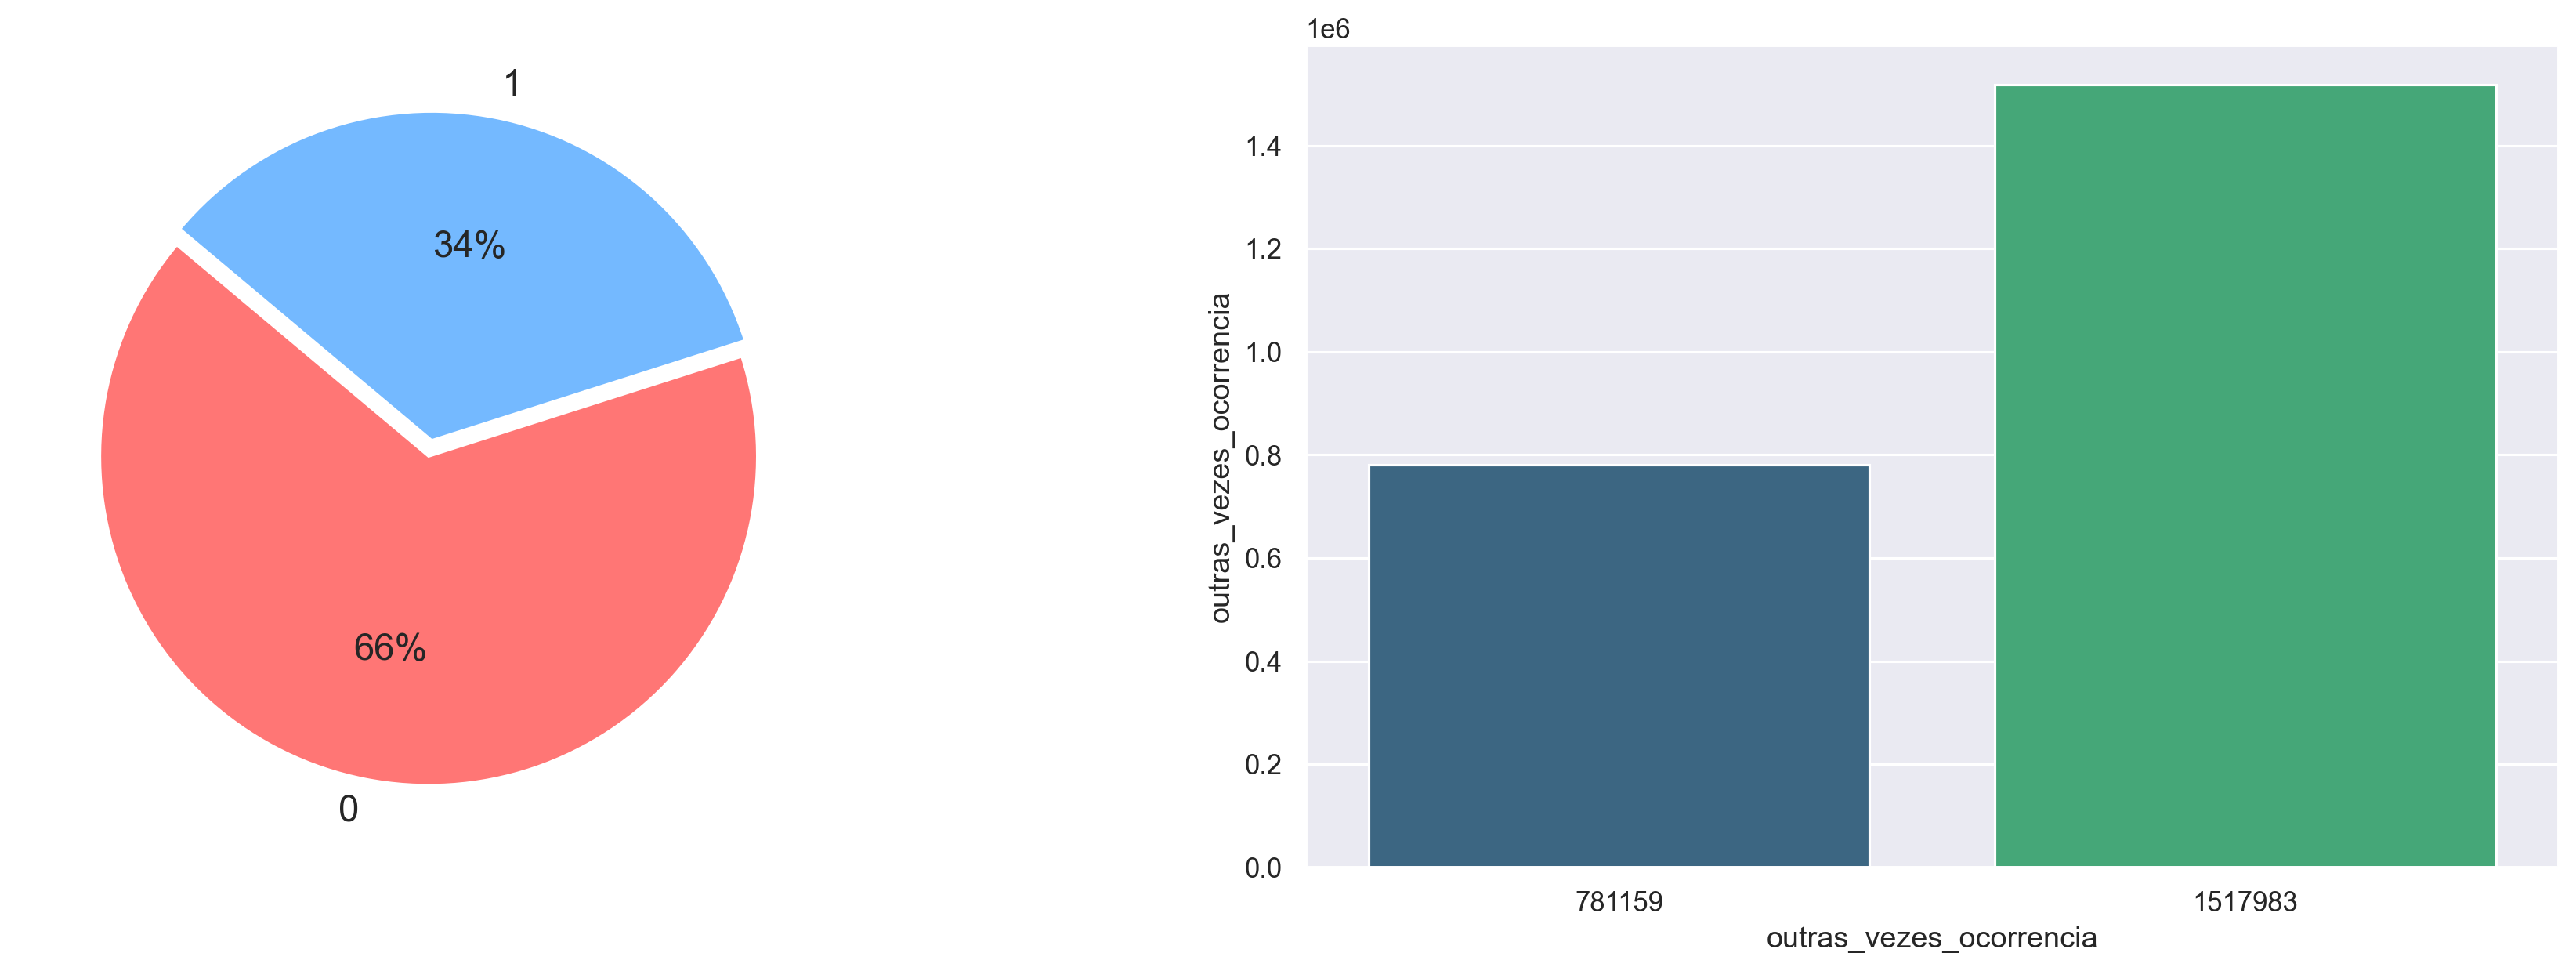

In [9]:
labels = [0,1]
sizes = [1517983, 781159]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = label.value_counts(), y = label.value_counts(), palette= 'viridis')

plt.show()

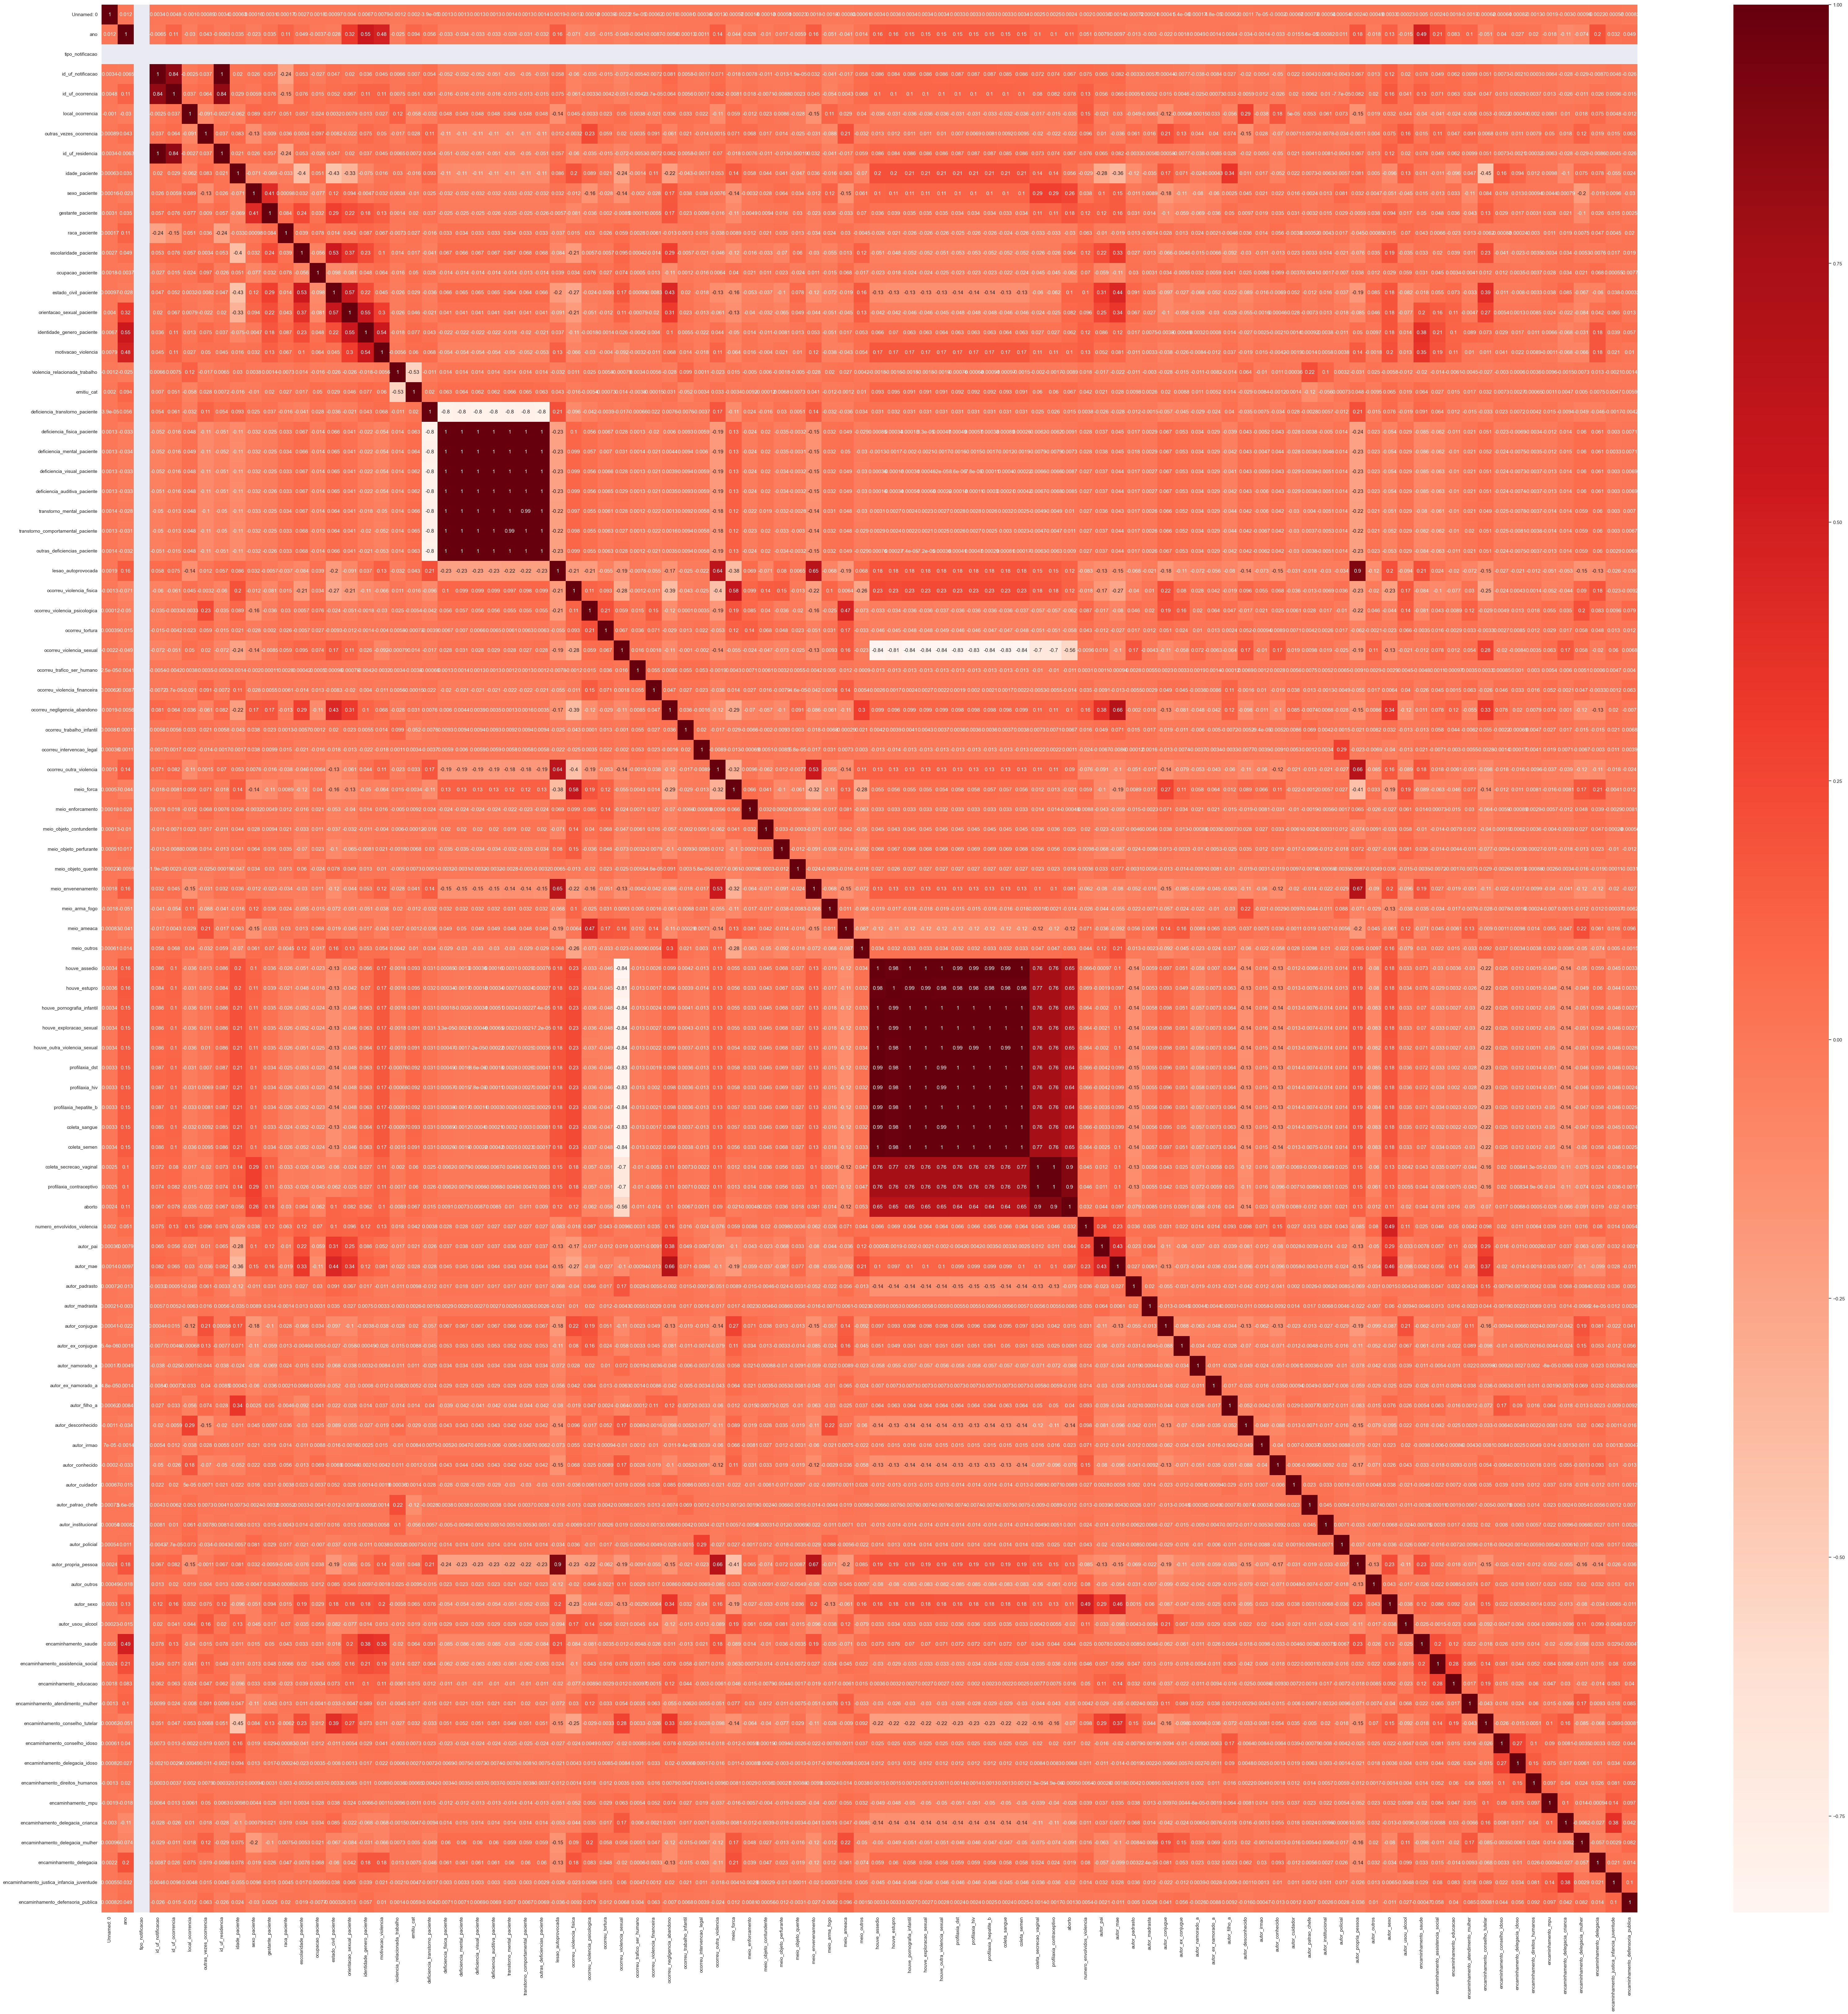

In [13]:
plt.figure(figsize=(80,80))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

Xtreino, Xteste, Ytreino, Yteste=train_test_split(feature, label, test_size=0.6, shuffle=True, random_state=0)

In [10]:
# transformação opcional do formato dos dados
# inputs = {}

# for name, column in features.items():
#  dtype = column.dtype
#   if dtype == object:
#     features.drop(name, axis=1)
#   else:
#     dtype = tf.float32
# 
#   inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

In [14]:
#definindo funções de avaliação de modelo
def mape(Y_actual, Y_Predicted):
    mape = np.mean(np.abs( Y_actual - Y_Predicted)/Y_actual)*100
    return mape

LGR = LogisticRegression()
SVM = SVC()
KNN = KNeighborsClassifier()
DTR = DecisionTreeClassifier(max_depth=5)
RFR = RandomForestClassifier()
XGB = XGBClassifier(n_estimators=100).fit(x_train, y_train)

model_names = list(['NVB', 'LGR', 'SVM', 'KNN', 'DTR', 'RFR', 'XGB'])
model_list = list([LGR, SVM, KNN, DTR, RFR, XGB])

def train_model(model):
    model.fit(Xtreino, Ytreino)
    Ypred = model.predict(Xteste)
    Yprob = model.predict_proba(Xteste)
    accuracy = round(accuracy_score(Yteste, Ypred), 3)
    precision = round(precision_score(Yteste, Ypred), 3)
    recall = round(recall_score(Yteste, Ypred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(Yteste, Ypred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(Yteste, Yprob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

Accuracy of the model: 0.574
Precision Score of the model: 0.394
Recall Score of the model: 0.471


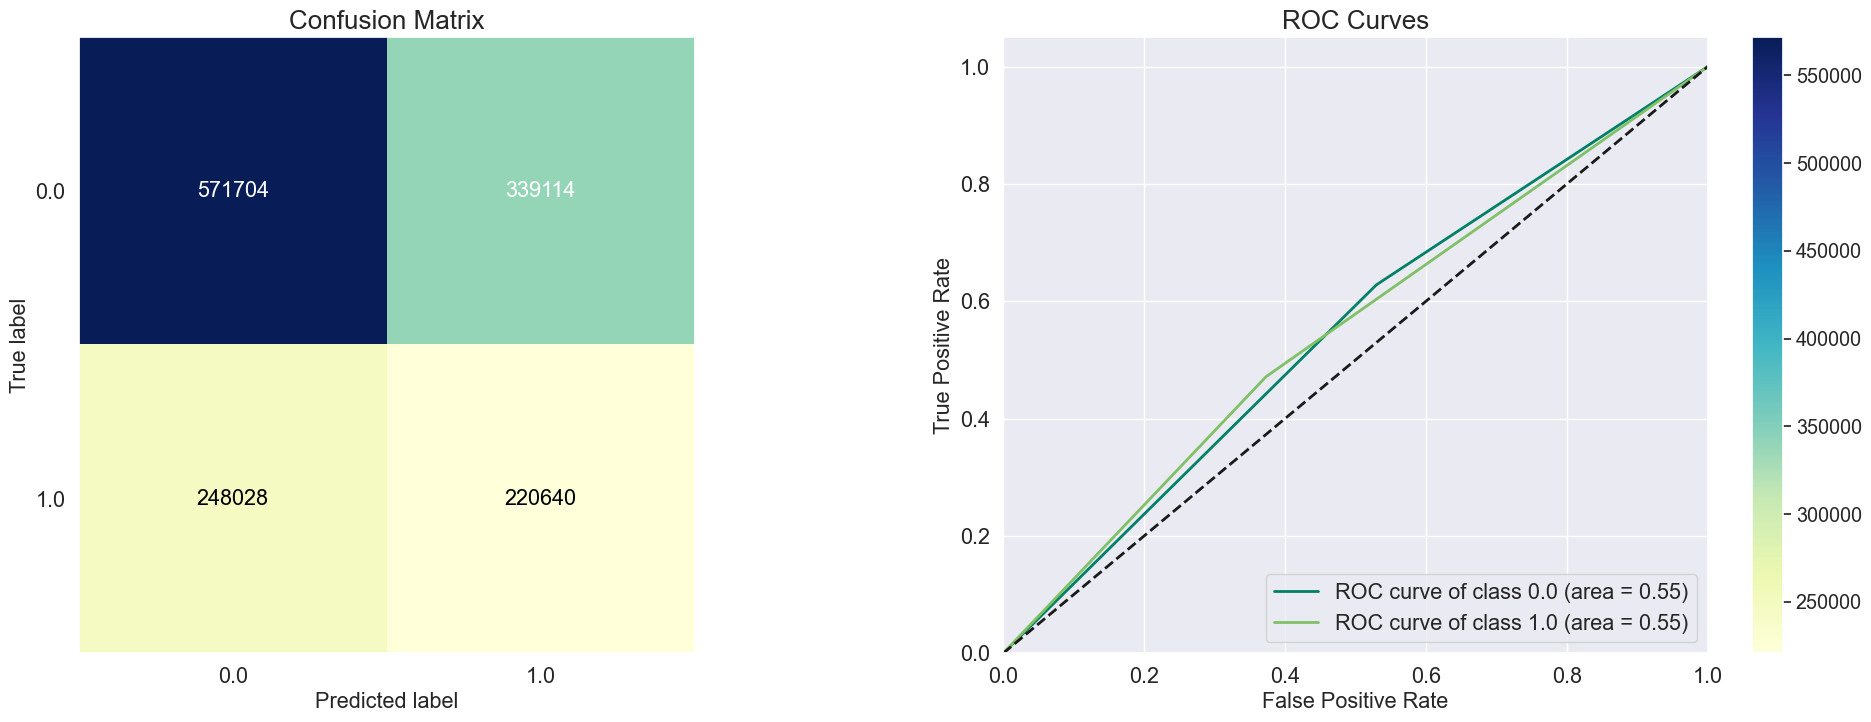

In [12]:
nb = MultinomialNB()
train_model(nb)

O modelo Naive Bayes teve baixa acurácia, baixa precisão e baixo recall.

Accuracy of the model: 0.732
Precision Score of the model: 0.649
Recall Score of the model: 0.463


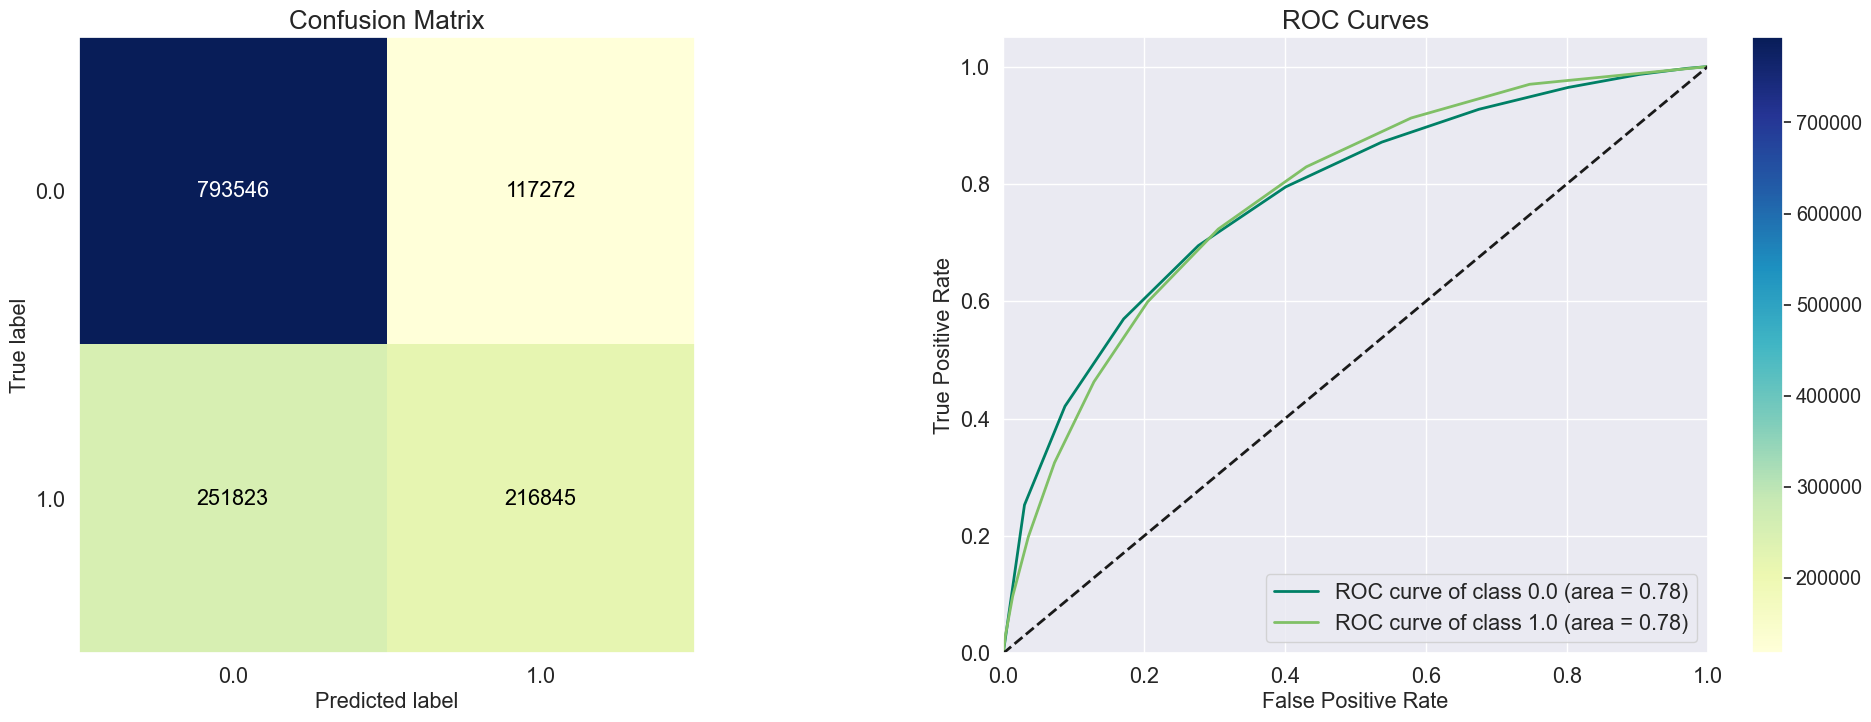

In [13]:
rf = RandomForestClassifier(n_estimators= 10)
train_model(rf)
n_estimators = [10, 20, 30]
accuracy_train = []
accuracy_val = []
for i in n_estimators:
    clf = RandomForestClassifier(n_estimators=i, random_state=1)
    clf.fit(Xtreino, Ytreino)
    accr = mape(Ytreino, clf.predict(Xtreino))
    accuracy_train.append(accr)
    accr = mape(Yteste, clf.predict(Xteste))
    accuracy_val.append(accr)
f, ax = plt.subplots(1, figsize=(8,6))
plt.plot(n_estimators, accuracy_train, label='Train score')
plt.plot(n_estimators, accuracy_val, label='Val score')
plt.legend(loc='best')
plt.xlabel('Number of estimators')
plt.ylabel('Mape')
plt.title('Performance on Training set and Val set')

O modelo Random Forests apresentou acurácia e precisão melhores que o Naive Bayes, mas recall não mudou significativamente.

Accuracy of the model: 0.66
Precision Score of the model: 0.471
Recall Score of the model: 0.0


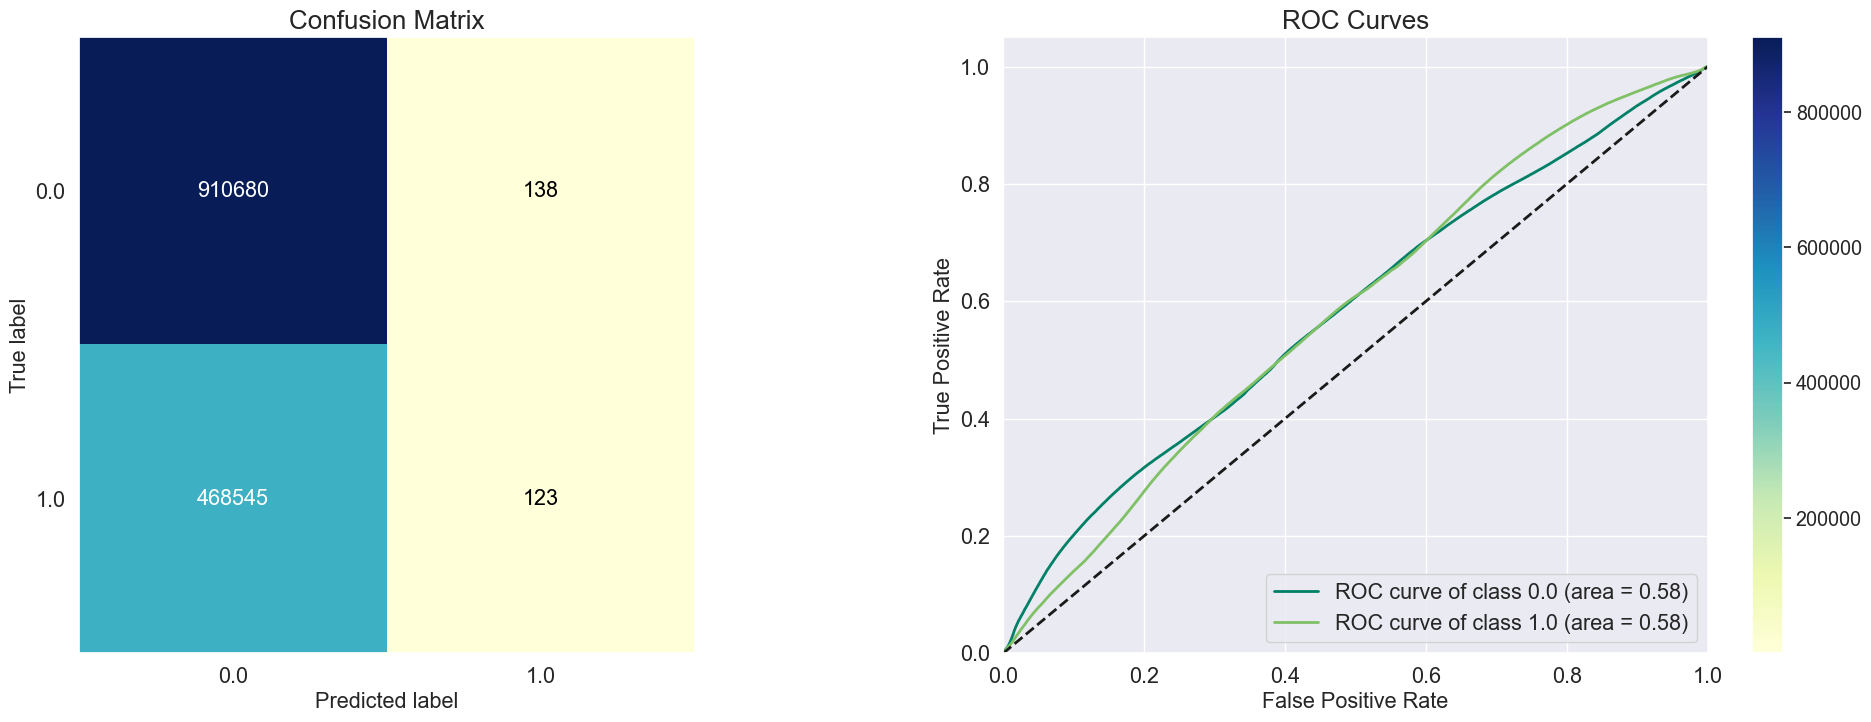

In [14]:
lr = LogisticRegression()
train_model(lr)

Accuracy of the model: 0.67
Precision Score of the model: 0.514
Recall Score of the model: 0.523


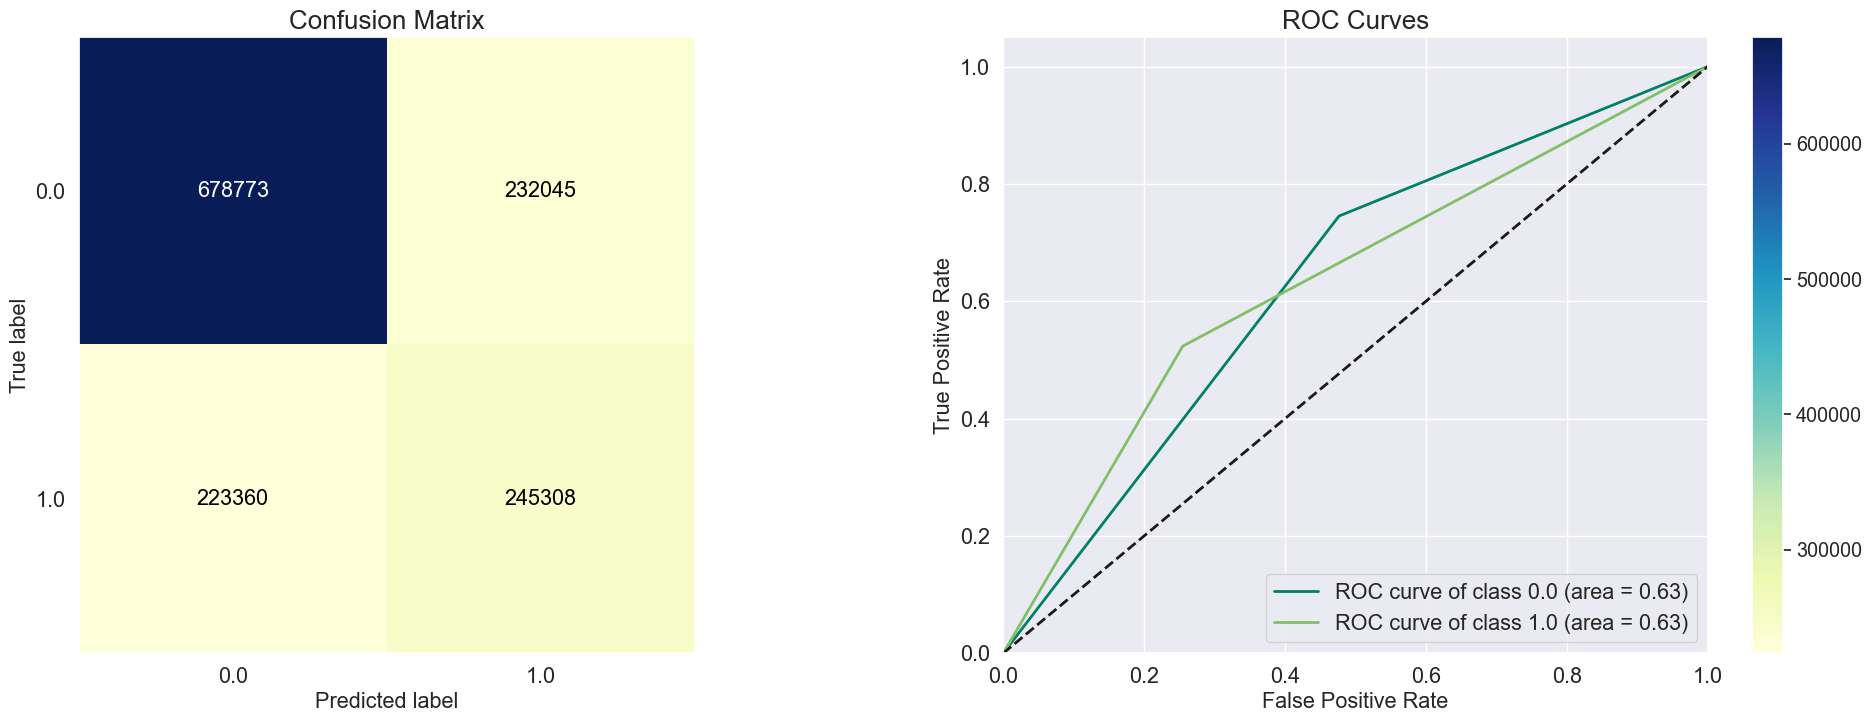

In [15]:
dtree = DecisionTreeClassifier()
train_model(dtree)

In [16]:
# agrupando modelos
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 50)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(Xtreino, Ytreino)
Y_prediction = vot_hard.predict(Xteste)

# using accuracy_score metric to predict accuracy
score = accuracy_score(Yteste, Y_prediction)
print("Hard Voting Score % d" % score)

# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(Xtreino, Ytreino)
Y_prediction = vot_soft.predict(Xteste)

# using accuracy_score
score = accuracy_score(Yteste, Y_prediction)
print("Soft Voting Score % d" % score)

Naive Bayes:
Accuracy of the model: 0.574
Precision Score of the model: 0.394
Recall Score of the model: 0.471

Random Forest:
Accuracy of the model: 0.732
Precision Score of the model: 0.649
Recall Score of the model: 0.462

LogisticRegression:
Accuracy of the model: 0.66
Precision Score of the model: 0.471
Recall Score of the model: 0.0

Árvore Decisória:
Accuracy of the model: 0.67
Precision Score of the model: 0.514
Recall Score of the model: 0.523

X   Naive Bayes
X   Regressão Logística
*   K-Nearest Neighbours
*   Support Vector Machine
*   Árvore Decisória
*   Bagging Decision Tree (Ensemble Learning I)
*   Boosted Decision Tree (Ensemble Learning II)
X   Random Forest (Ensemble Learning III)
*   Voting Classification (Ensemble Learning IV)
*   Rede Neural (Deep Learning)

# modelo de regressão
# SGD como otimizador
modelo = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

modelo.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.SGD())

# fit do modelo com callbacks
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=2,factor=0.2)
early_stopper = tf.keras.callbacks.EarlyStopping(patience=5)
callbacks = [lr_reducer,early_stopper]

history = modelo.fit(Xtreino,
                    Ytreino,
                    validation_data=(Xteste,Yteste), 
                    callbacks=callbacks,
                    epochs=5,
                    batch_size=64,
                    verbose=1)

modelo.save('./pesos/')

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

modelo.summary()